In [49]:
from trainer import Trainer
from model.base_model import BaseNet
import pathlib
import utils
import pandas as pd
import numpy as np

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1 - base model

In [66]:
trainer = Trainer()

In [13]:
trainer.train()

Train for 8 steps, validate for 3 steps
Epoch 1/3
7/8 [=========================>....] - ETA: 2s - loss: 0.6301 - accuracy: 0.7143
Epoch 00001: val_loss improved from inf to 0.61699, saving model to experiments/base_model/weights_val_loss.hdf5
8/8 [==============================] - 21s 3s/step - loss: 0.6211 - accuracy: 0.7031 - val_loss: 0.6170 - val_accuracy: 0.6667
Epoch 2/3
7/8 [=========================>....] - ETA: 1s - loss: 0.4282 - accuracy: 0.8393
Epoch 00002: val_loss improved from 0.61699 to 0.47055, saving model to experiments/base_model/weights_val_loss.hdf5
8/8 [==============================] - 13s 2s/step - loss: 0.4151 - accuracy: 0.8281 - val_loss: 0.4706 - val_accuracy: 0.7917
Epoch 3/3
7/8 [=========================>....] - ETA: 1s - loss: 0.3607 - accuracy: 0.8393
Epoch 00003: val_loss did not improve from 0.47055
8/8 [==============================] - 12s 1s/step - loss: 0.3522 - accuracy: 0.8438 - val_loss: 0.6021 - val_accuracy: 0.7083


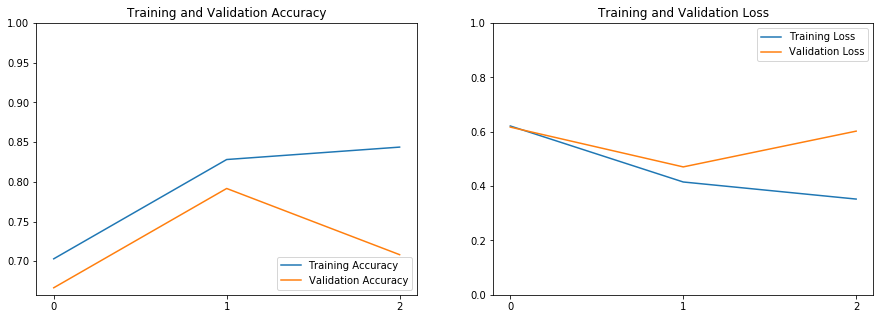

In [67]:
trainer.plot_history()

In [68]:
1341 + 3875

5216

In [69]:
5216 // 8

652

In [70]:
234 + 390

624

In [71]:
624 // 8

78